In [1]:
import pandas as pd
import arviz as az

itpc = pd.read_csv('data/itpc.csv')
display(itpc)
data = itpc.where(itpc['type'] == 'z_normalized_itpc').dropna()
display(data)


,label,sub,P,T,value,type
0,lh_bankssts,1,pre,real,7.535769,z_normalized_itpc
1,rh_bankssts,1,pre,real,1.453825,z_normalized_itpc
2,lh_caudalanteriorcingulate,1,pre,real,3.922617,z_normalized_itpc
3,rh_caudalanteriorcingulate,1,pre,real,0.671163,z_normalized_itpc
4,lh_caudalmiddlefrontal,1,pre,real,11.390463,z_normalized_itpc
...,...,...,...,...,...,...
11827,rh_supramarginal,15,post,real,0.589203,stim_itpc
11828,lh_temporalpole,15,post,real,0.065616,stim_itpc
11829,rh_temporalpole,15,post,real,0.233202,stim_itpc
11830,lh_transversetemporal,15,post,real,0.388224,stim_itpc


,label,sub,P,T,value,type
0,lh_bankssts,1.0,pre,real,7.535769,z_normalized_itpc
1,rh_bankssts,1.0,pre,real,1.453825,z_normalized_itpc
2,lh_caudalanteriorcingulate,1.0,pre,real,3.922617,z_normalized_itpc
3,rh_caudalanteriorcingulate,1.0,pre,real,0.671163,z_normalized_itpc
4,lh_caudalmiddlefrontal,1.0,pre,real,11.390463,z_normalized_itpc
...,...,...,...,...,...,...
11691,rh_supramarginal,15.0,post,real,36.190182,z_normalized_itpc
11692,lh_temporalpole,15.0,post,real,-1.045617,z_normalized_itpc
11693,rh_temporalpole,15.0,post,real,21.524367,z_normalized_itpc
11694,lh_transversetemporal,15.0,post,real,7.121248,z_normalized_itpc


In [2]:
import pandas as pd
import bambi as bmb
import numpy as np

# Now we set up the model using Bambi
itpc['T'] = pd.Categorical(itpc['T'], categories=['sham', 'real'], ordered=True)
real_stim_data = itpc.where(itpc['P'] == 'post').dropna()

model1 = bmb.Model("value ~ T + (1|sub) + (1|label)", data=data)
# Fit the model
results = model1.fit(draws=8000, chains=8,
    inference_method="numpyro_nuts",
    nuts_kwargs=dict(max_tree_depth=100))

# Add fixed effects for P, hemisphere, and their interaction
# Add random effects for region and subject


WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.



You can find the C code in this temporary file: /var/folders/xq/sl7xjp_95qx7wfngy6s6vvg00000gn/T/pytensor_compilation_error_42ky53xe


CompileError: Compilation failed (return status=1):
/Users/daniel/.pyenv/versions/spectral-3.12/bin/clang++ -dynamiclib -g -O3 -fno-math-errno -Wno-unused-label -Wno-unused-variable -Wno-write-strings -Wno-c++11-narrowing -fno-exceptions -fno-unwind-tables -fno-asynchronous-unwind-tables -DNPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION -fPIC -undefined dynamic_lookup -I/Users/daniel/.pyenv/versions/spectral-3.12/lib/python3.12/site-packages/numpy/core/include -I/Users/daniel/.pyenv/versions/miniconda3-3.12-24.7.1-0/envs/spectral-3.12/include/python3.12 -I/Users/daniel/.pyenv/versions/spectral-3.12/lib/python3.12/site-packages/pytensor/link/c/c_code -L/Users/daniel/.pyenv/versions/spectral-3.12/lib -fvisibility=hidden -o /Users/daniel/.pytensor/compiledir_macOS-15.0-arm64-arm-64bit-arm-3.12.6-64/tmpjiz2iy67/m736a6a8ec3060852c8d1582e2badb5a77b212bb487494540614072b059cc4bac.so /Users/daniel/.pytensor/compiledir_macOS-15.0-arm64-arm-64bit-arm-3.12.6-64/tmpjiz2iy67/mod.cpp
dyld[15571]: Symbol not found: __ZNK4tapi2v119LinkerInterfaceFile28getPlatformsAndMinDeploymentEv
  Referenced from: <FDE9B676-8FF7-3D2F-B75C-B230CB71A4E6> /Library/Developer/CommandLineTools/usr/bin/ld
  Expected in:     <15C501C6-0EF4-3E32-9C14-04EC4CD23D35> /Users/daniel/.pyenv/versions/miniconda3-3.12-24.7.1-0/envs/spectral-3.12/lib/libtapi.dylib
clang++: error: unable to execute command: Abort trap: 6
clang++: error: linker command failed due to signal (use -v to see invocation)

Apply node that caused the error: MakeVector{dtype='int64'}(sub__factor_dim)
Toposort index: 0
Inputs types: [TensorType(int64, shape=())]

Backtrace when the node is created (use PyTensor flag traceback__limit=N to make it longer):
  File "/Users/daniel/.pyenv/versions/spectral-3.12/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/xq/sl7xjp_95qx7wfngy6s6vvg00000gn/T/ipykernel_15386/3099155982.py", line 11, in <module>
    results = model1.fit(draws=8000, chains=8,
  File "/Users/daniel/.pyenv/versions/spectral-3.12/lib/python3.12/site-packages/bambi/models.py", line 330, in fit
    self.build()
  File "/Users/daniel/.pyenv/versions/spectral-3.12/lib/python3.12/site-packages/bambi/models.py", line 373, in build
    self.backend.build(self)
  File "/Users/daniel/.pyenv/versions/spectral-3.12/lib/python3.12/site-packages/bambi/backend/pymc.py", line 85, in build
    self.components[name].build(self, spec)
  File "/Users/daniel/.pyenv/versions/spectral-3.12/lib/python3.12/site-packages/bambi/backend/model_components.py", line 57, in build
    self.build_group_specific_terms(pymc_backend, bmb_model)
  File "/Users/daniel/.pyenv/versions/spectral-3.12/lib/python3.12/site-packages/bambi/backend/model_components.py", line 141, in build_group_specific_terms
    coef, predictor = group_specific_term.build(bmb_model)
  File "/Users/daniel/.pyenv/versions/spectral-3.12/lib/python3.12/site-packages/bambi/backend/terms.py", line 117, in build
    if len(coef.shape.eval()) == 2 and coef.shape.eval()[-1] == 1:

HINT: Use a linker other than the C linker to print the inputs' shapes and strides.
HINT: Use the PyTensor flag `exception_verbosity=high` for a debug print-out and storage map footprint of this Apply node.

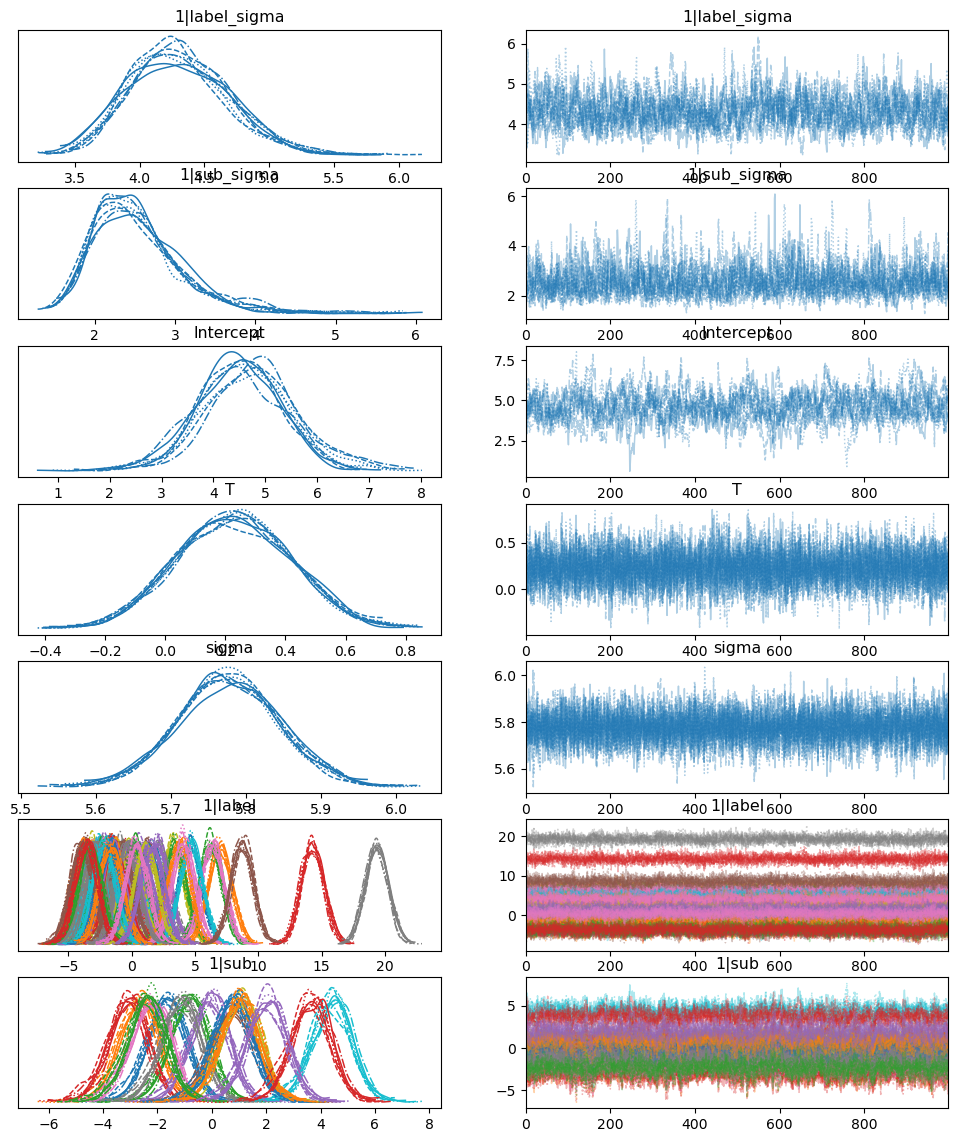

In [34]:
az.plot_trace(results);

In [35]:
display(az.summary(results))


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
1|label_sigma,4.307,0.389,3.604,5.031,0.013,0.009,844.0,1685.0,1.01
1|sub_sigma,2.530,0.567,1.627,3.587,0.016,0.011,1217.0,1915.0,1.01
Intercept,4.603,0.869,2.900,6.199,0.042,0.030,433.0,826.0,1.03
T[sham],0.231,0.190,-0.117,0.588,0.002,0.002,9068.0,6574.0,1.00
sigma,5.776,0.067,5.649,5.903,0.001,0.000,11211.0,6012.0,1.00
...,...,...,...,...,...,...,...,...,...
1|sub[11.0],0.754,0.742,-0.732,2.074,0.028,0.020,709.0,1832.0,1.01
1|sub[12.0],1.015,0.753,-0.524,2.333,0.028,0.020,719.0,1596.0,1.01
1|sub[13.0],-2.418,0.752,-3.951,-1.100,0.028,0.020,704.0,1855.0,1.02
1|sub[14.0],3.637,0.753,2.178,5.024,0.028,0.020,719.0,1709.0,1.01


Mean effect of real stimulation compared to sham: 0.2309
95% HDI: [-0.1166, 0.5881]


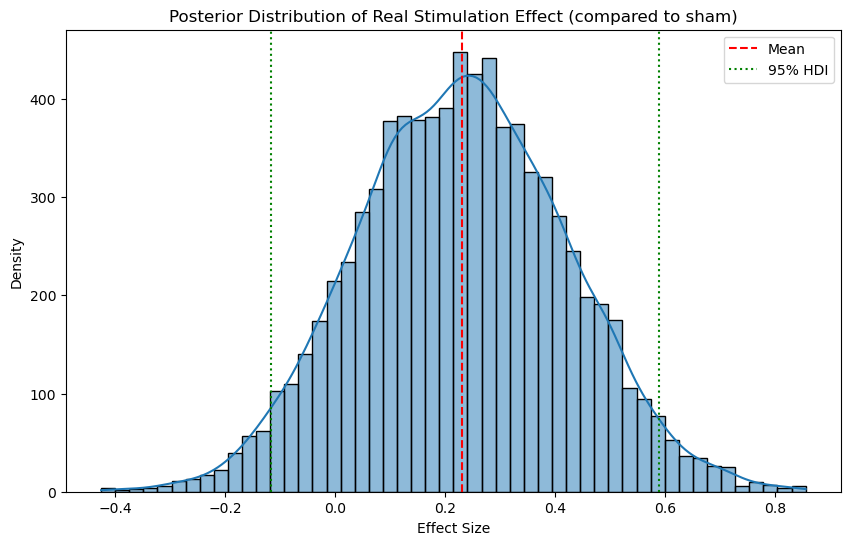


Effect on labels (sorted by magnitude):
rh_transversetemporal      19.343426
lh_transversetemporal      14.271094
rh_supramarginal            8.710736
lh_supramarginal            6.982723
rh_lateralorbitofrontal     6.389393
                             ...    
rh_parsopercularis          0.332363
rh_isthmuscingulate        -0.252465
rh_entorhinal              -0.157717
lh_fusiform                 0.127557
lh_insula                   0.042446
Name: Effect, Length: 68, dtype: float64


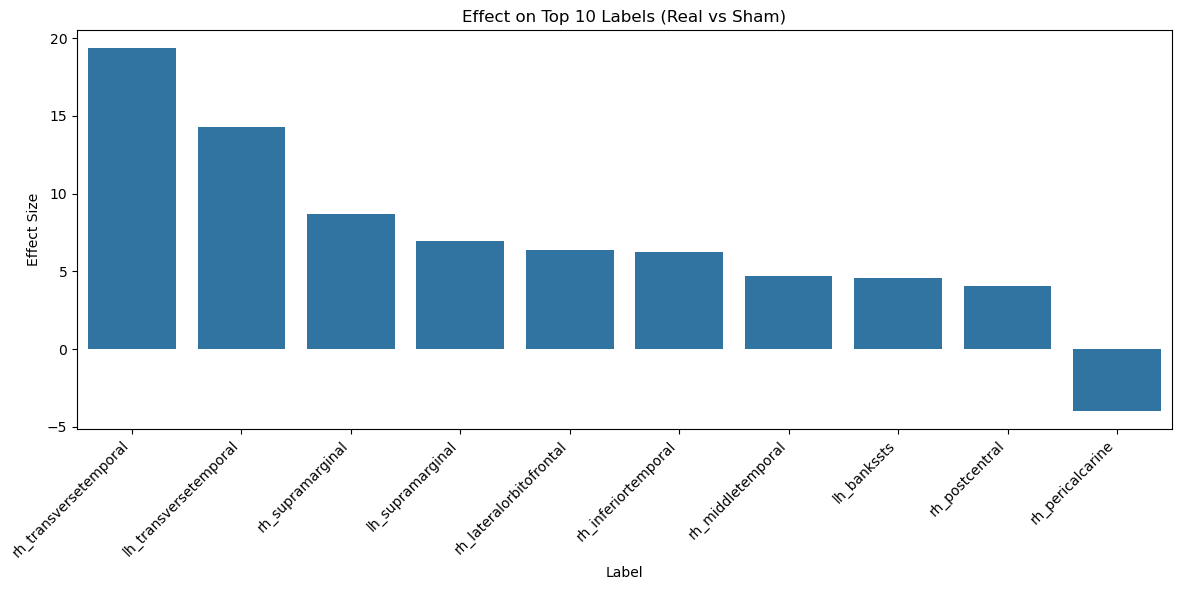


Label with the biggest effect (Real vs Sham): rh_transversetemporal
Effect size: 19.3434


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az

# Extract the posterior samples for the T effect
t_samples = results.posterior['T'].values.flatten()

# Calculate summary statistics
t_mean = np.mean(t_samples)
t_hdi = az.hdi(t_samples)

print(f"Mean effect of real stimulation compared to sham: {t_mean:.4f}")
print(f"95% HDI: [{t_hdi[0]:.4f}, {t_hdi[1]:.4f}]")

# Plot posterior distribution
plt.figure(figsize=(10, 6))
sns.histplot(t_samples, kde=True)
plt.title("Posterior Distribution of Real Stimulation Effect (compared to sham)")
plt.xlabel("Effect Size")
plt.ylabel("Density")
plt.axvline(t_mean, color='r', linestyle='--', label='Mean')
plt.axvline(t_hdi[0], color='g', linestyle=':', label='95% HDI')
plt.axvline(t_hdi[1], color='g', linestyle=':')
plt.legend()
plt.show()

# Analyze effect on different labels
label_effects = results.posterior['1|label']
label_means = label_effects.mean(dim=('chain', 'draw'))
label_df = pd.DataFrame({'Effect': label_means.values}, index=label_means.coords['label__factor_dim'].values)
sorted_labels = label_df.sort_values('Effect', key=abs, ascending=False)

print("\nEffect on labels (sorted by magnitude):")
print(sorted_labels['Effect'])

# Visualize effect on top 10 labels
top_10_labels = sorted_labels.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_labels.index, y='Effect', data=top_10_labels)
plt.title("Effect on Top 10 Labels (Real vs Sham)")
plt.xlabel("Label")
plt.ylabel("Effect Size")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Identify the label with the biggest effect
max_effect_label = sorted_labels.index[0]
max_effect_value = sorted_labels['Effect'].iloc[0]
print(f"\nLabel with the biggest effect (Real vs Sham): {max_effect_label}")
print(f"Effect size: {max_effect_value:.4f}")

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az

# Extract the posterior samples
t_samples = results.posterior['T'].values
label_effects = results.posterior['1|label'].values

# Calculate the total effect for each label
total_effects = t_samples[:, :, np.newaxis] + label_effects

# Calculate mean effect for each label
label_means = total_effects.mean(axis=(0, 1))

# Get label names
label_names = results.posterior['1|label'].coords['label__factor_dim'].values

# Create DataFrame for easier manipulation
label_df = pd.DataFrame({'Effect': label_means}, index=label_names)

# Sort labels by the magnitude of effect
sorted_labels = label_df.sort_values('Effect', key=abs, ascending=False)

print("\nTotal effect of T on labels (sorted by magnitude):")
print(sorted_labels['Effect'])

# Visualize effect on top 10 labels
top_10_labels = sorted_labels.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_labels.index, y='Effect', data=top_10_labels)
plt.title("Total Effect of T on Top 10 Labels")
plt.xlabel("Label")
plt.ylabel("Effect Size")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Identify the label with the biggest effect
max_effect_label = sorted_labels.index[0]
max_effect_value = sorted_labels['Effect'].iloc[0]
print(f"\nLabel with the biggest effect of T: {max_effect_label}")
print(f"Effect size: {max_effect_value:.4f}")

# Calculate and plot the posterior distribution of the effect for the top label
top_label_effects = total_effects[:, :, label_names == max_effect_label].flatten()
plt.figure(figsize=(10, 6))
sns.histplot(top_label_effects, kde=True)
plt.title(f"Posterior Distribution of T Effect on {max_effect_label}")
plt.xlabel("Effect Size")
plt.ylabel("Density")
plt.axvline(max_effect_value, color='r', linestyle='--', label='Mean')
hdi = az.hdi(top_label_effects)
plt.axvline(hdi[0], color='g', linestyle=':', label='95% HDI')
plt.axvline(hdi[1], color='g', linestyle=':')
plt.legend()
plt.show()

print(f"95% HDI for {max_effect_label}: [{hdi[0]:.4f}, {hdi[1]:.4f}]")

ValueError: operands could not be broadcast together with shapes (8,1000,1,1) (8,1000,68) 

In [29]:
list(results.posterior.data_vars)


['1|label_sigma', '1|sub_sigma', 'Intercept', 'T', 'sigma', '1|label', '1|sub']

>After verifying the lack of significant difference between the  Pre-Sham and Pre-Real sessions, the map resulting from Post minus  Pre sham/real tDCS effects were firstly computed and then the Real  versus Sham stimulation were contrasted using a cluster-based permutation approach (Maris & Oostenveld, 2007). The null-hypothesis  corresponded to no difference between the strength of Power  (or ITPC) clusters obtained from Real and Sham tDCS stimulation,  after having shuffled them through 5,000 permutations. The strength  of each cluster was defined as the sum of the absolute t-values of all  the vertices in the cluster, allowing considering both the size of the  cluster and its statistical significance.

> Note that this procedure  accounts for multiple comparisons by design, and, since it is quite conservative, some clusters may not reach significance.  To investigate the effect of tDCS on early and transient brain  responses, we ran a whole-cortex cluster-based premutation analysis  on event-related responses using all the timepoints in the 0-150 ms  post stimulus interval. As for the ITPC and Power, Real and Sham  stimulations were compared after calculating Post-minus Pre-maps.


Also Interesting materials
https://vasishth.github.io/bayescogsci/book/ch-contr.html

Mean effect of T: 0.2305
95% HDI: [-0.1095, 0.5576]


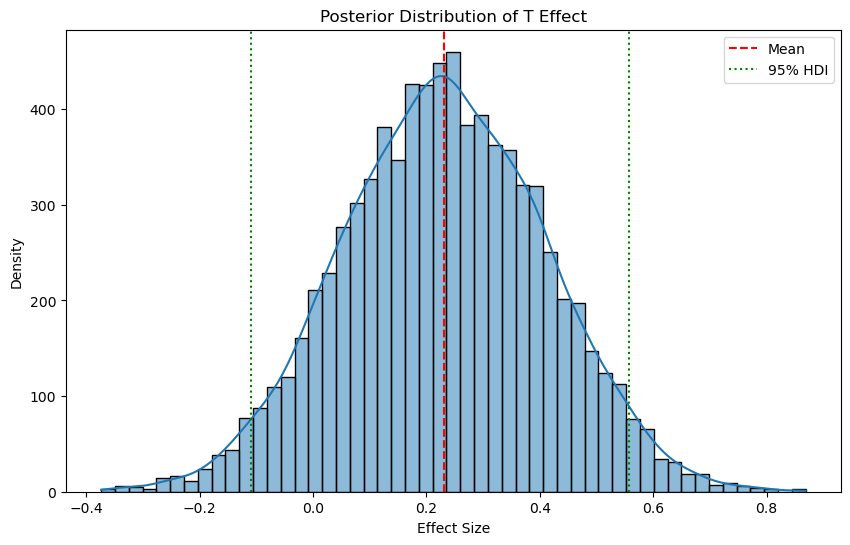

KeyError: "No variable named 'label'. Variables on the dataset include ['1|label_sigma', '1|sub_sigma', 'Intercept', 'T', 'sigma', ..., 'chain', 'label__factor_dim', 'T_dim', '1|label', '1|sub']"

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az

# Assuming 'results' is your InferenceData object

# Extract posterior samples for the T effect
t_samples = results.posterior['T'].values.flatten()

# Calculate summary statistics
t_mean = np.mean(t_samples)
t_hdi = az.hdi(t_samples)

print(f"Mean effect of T: {t_mean:.4f}")
print(f"95% HDI: [{t_hdi[0]:.4f}, {t_hdi[1]:.4f}]")

# Plot posterior distribution
plt.figure(figsize=(10, 6))
sns.histplot(t_samples, kde=True)
plt.title("Posterior Distribution of T Effect")
plt.xlabel("Effect Size")
plt.ylabel("Density")
plt.axvline(t_mean, color='r', linestyle='--', label='Mean')
plt.axvline(t_hdi[0], color='g', linestyle=':', label='95% HDI')
plt.axvline(t_hdi[1], color='g', linestyle=':')
plt.legend()
plt.show()

# Analyze T effect on different labels
# We need to extract the random effects for labels
label_effects = results.posterior['label']

# Calculate mean effect for each label
label_means = label_effects.mean(dim=('chain', 'draw'))

# Convert to DataFrame for easier manipulation
label_df = pd.DataFrame({'T': label_means.values}, index=label_means.coords['label'].values)

# Sort labels by the magnitude of T effect
sorted_labels = label_df.sort_values('T', key=abs, ascending=False)

print("\nT effect on labels (sorted by magnitude):")
print(sorted_labels['T'])

# Visualize T effect on top 10 labels
top_10_labels = sorted_labels.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_labels.index, y='T', data=top_10_labels)
plt.title("T Effect on Top 10 Labels")
plt.xlabel("Label")
plt.ylabel("Effect Size")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Mean effect of T: 0.2305
95% HDI: [-0.1095, 0.5576]


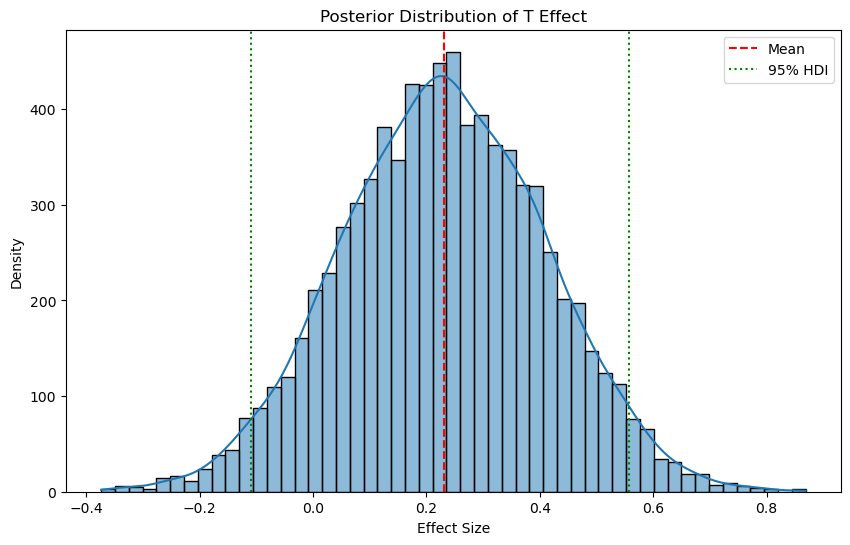


T effect on labels (sorted by magnitude):
rh_transversetemporal      19.399562
lh_transversetemporal      14.328031
rh_supramarginal            8.760359
lh_supramarginal            7.034440
rh_lateralorbitofrontal     6.456880
                             ...    
rh_posteriorcingulate      -0.320091
rh_isthmuscingulate        -0.195981
lh_fusiform                 0.182706
rh_entorhinal              -0.109017
lh_insula                   0.095375
Name: T, Length: 68, dtype: float64


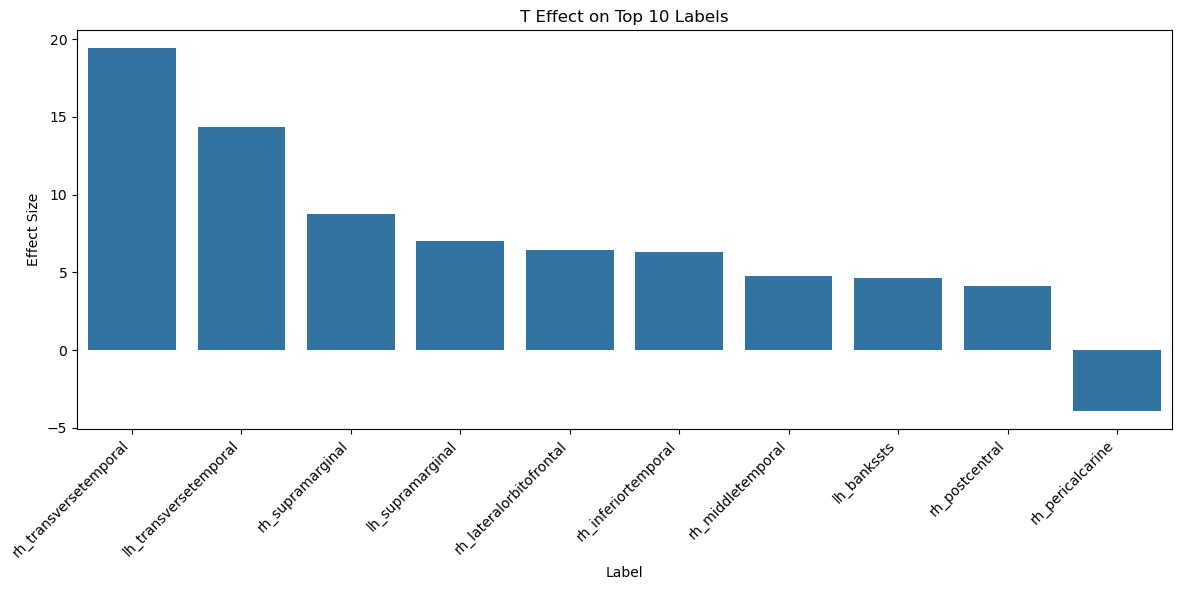


Overall T effect: 0.2305
95% HDI: [-0.1095, 0.5576]

Label with the biggest effect: rh_transversetemporal
Effect size: 19.3996


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az

# Assuming 'results' is your InferenceData object

# Extract posterior samples for the T effect
t_samples = results.posterior['T'].values.flatten()

# Calculate summary statistics
t_mean = np.mean(t_samples)
t_hdi = az.hdi(t_samples)

print(f"Mean effect of T: {t_mean:.4f}")
print(f"95% HDI: [{t_hdi[0]:.4f}, {t_hdi[1]:.4f}]")

# Plot posterior distribution
plt.figure(figsize=(10, 6))
sns.histplot(t_samples, kde=True)
plt.title("Posterior Distribution of T Effect")
plt.xlabel("Effect Size")
plt.ylabel("Density")
plt.axvline(t_mean, color='r', linestyle='--', label='Mean')
plt.axvline(t_hdi[0], color='g', linestyle=':', label='95% HDI')
plt.axvline(t_hdi[1], color='g', linestyle=':')
plt.legend()
plt.show()

# Analyze T effect on different labels
# We need to extract the random effects for labels
label_effects = results.posterior['1|label']

# Calculate mean effect for each label
label_means = label_effects.mean(dim=('chain', 'draw'))

# Convert to DataFrame for easier manipulation
label_df = pd.DataFrame({'T': label_means.values}, index=label_means.coords['label__factor_dim'].values)

# Sort labels by the magnitude of T effect
sorted_labels = label_df.sort_values('T', key=abs, ascending=False)

print("\nT effect on labels (sorted by magnitude):")
print(sorted_labels['T'])

# Visualize T effect on top 10 labels
top_10_labels = sorted_labels.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_labels.index, y='T', data=top_10_labels)
plt.title("T Effect on Top 10 Labels")
plt.xlabel("Label")
plt.ylabel("Effect Size")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print the overall T effect
print(f"\nOverall T effect: {t_mean:.4f}")
print(f"95% HDI: [{t_hdi[0]:.4f}, {t_hdi[1]:.4f}]")

# Identify the label with the biggest effect
max_effect_label = sorted_labels.index[0]
max_effect_value = sorted_labels['T'].iloc[0]
print(f"\nLabel with the biggest effect: {max_effect_label}")
print(f"Effect size: {max_effect_value:.4f}")

In [17]:
# Generate posterior predictive samples
ppc = results.posterior_predictive()

# Calculate the differences
pre_samples = ppc.where(ppc.P == 'pre').mean()
post_samples = ppc.where(ppc.P == 'post').mean()
differences = post_samples - pre_samples

# Calculate the mean difference and 95% credible interval
mean_diff = differences.mean()
credible_interval = differences.quantile([0.025, 0.975])

print("Mean differences (post - pre):")
print(mean_diff)
print("\n95% Credible Intervals:")
print(credible_interval)

AttributeError: 'InferenceData' object has no attribute 'posterior_predictive'